In [4]:
import Simulator.ChaoticSystem as CS
import matplotlib.pyplot as plt
import numpy as np

# Test ChaoticSystem

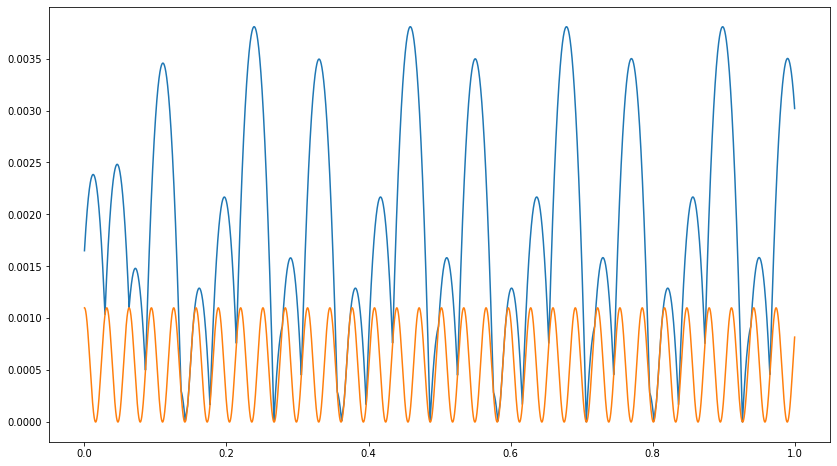

In [5]:
x0=0.0012
v0=0.12
A=0.41e-3
w=200

#b=ball(x0,2)
#p=platform(A=A,w=10)
c=CS.chaotic_system(x0,v0,A,w,0.53)
dt=0.0001
ndt=10_000


t_arr=[]
A_arr=[]

for A in np.linspace(300,550,250):
    A=A*1e-6
    #print('--------------',A)
    c.reset_platform(A)
    c.reset_ball(3*A,v0)
    c.reset()
    

    xcb = [c.get_ball_x()]
    xcp = [c.get_platform_x()]

    t = [0]
    for i in range(ndt):
        c.evolve(dt)
        t.append(t[i]+dt)
        xcb.append(c.get_ball_x())
        xcp.append(c.get_platform_x())
    
    A_arr.append([A for j in range(len( c.get_t_collisions()))])
    t_arr.append(c.get_t_collisions())
    
fig = plt.figure(figsize=(14,8))
plt.plot(t,xcb)
plt.plot(t,xcp)

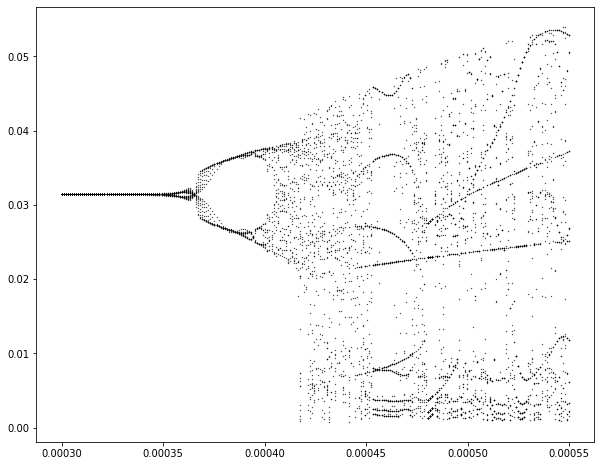

In [20]:
n_start=10
fig=plt.figure(figsize=(10,8))
for i in range(len(t_arr)):
    plt.scatter(A_arr[i][n_start:],t_arr[i][n_start:],c='k',s=0.1)

# Grid Layout

In [7]:
import ipywidgets as ipw

In [8]:
def create_expanded_button(description, button_style):
    return ipw.Button(description=description, button_style=button_style, layout=ipw.Layout(height='auto', width='auto'))

In [43]:
#Define the Grid
grid = ipw.GridspecLayout(6,3, height='300px')

b_v0 = ipw.widgets.FloatText(value=0., description='Ball v0:')
b_y0 = ipw.widgets.FloatText(value=0., description='Ball y0:')
b_A0 = ipw.widgets.FloatText(value=0., description='Platform A:')
b_w0 = ipw.widgets.FloatText(value=0., description='Platform w:')
b_mu = ipw.widgets.FloatText(value=0., description='Bounciness:')


def plot_evolution_static(x0,v0,A,w,mu):
    c=CS.chaotic_system(x0,v0,A,w,mu)
    plt.scatter('1','1')


grid[0,:] = create_expanded_button('Header','info')
grid[1,0]= b_y0
grid[2,0]= b_v0
grid[3,0]= b_A0
grid[4,0]= b_w0
grid[5,0]= b_mu
grid[1:,1:] = ipw.widgets.interact(plot_evolution_static, b_y0, b_v0, b_A0, b_w0, b_mu)


TypeError: __call__() takes from 1 to 2 positional arguments but 7 were given

GridspecLayout(children=(Button(button_style='info', description='Header', layout=Layout(grid_area='widget001'…

In [24]:

def plotX(s,l):
    x=np.linspace(0,10)
    plt.plot(x,x*s)
    plt.title(l)
    return

In [37]:
slider=ipw.widgets.FloatSlider()
txt=ipw.widgets.Text()
a=ipw.widgets.interact(plotX, s=slider, l=txt)

interactive(children=(FloatSlider(value=0.0, description='s'), Text(value='', description='l'), Output()), _do…

In [39]:
grid = ipw.GridspecLayout(3,3, height='300px')
grid[0,0] = slider
grid[1:,0] = txt
grid[:,1:] = a

AttributeError: 'function' object has no attribute 'layout'